1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np

# количество наблюдений


X = np.array ([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

n = len(X)

In [3]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X) ** 2)
b

2.620538882402765

In [4]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [5]:
y_hat = 444.177+2.621*X
y_hat

array([535.912, 562.122, 942.167, 968.377, 549.017, 627.647, 585.711,
       837.327, 758.697, 732.487])

In [6]:
y

array([401., 574., 874., 919., 459., 739., 653., 902., 746., 832.])

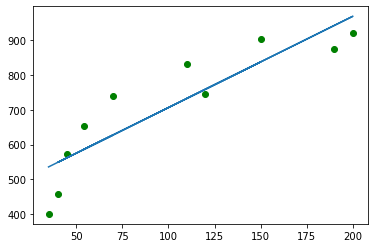

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline



fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(6, 4)
)
plt.scatter(X, y, c='green')
plt.plot(X, 444.177+2.621*X)

plt.show()


In [8]:
from numpy import reshape
import seaborn as sns


# без интерсепта
X=X.reshape ((10, 1))
X

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [9]:
y=y.reshape ((10, 1))
y

array([[401.],
       [574.],
       [874.],
       [919.],
       [459.],
       [739.],
       [653.],
       [902.],
       [746.],
       [832.]])

In [11]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y) 
B

array([[5.88982042]])

In [12]:
#  с интерсептом

X = np.hstack([np.ones((10,1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y)  # что-то не идет 
B

array([[444.17735732],
       [  2.62053888]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [14]:
def mse_(B1, y=y, x=X, n=10):
    return np.sum((B1*x-y)**2)/n

In [15]:
alpha = 1e-6 # не поняла откуда взялась альфа, вернее как ее посчитать

In [16]:
B1 = 0.1
n = 10

In [19]:
for i in range(3000):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    print ('B1={}'.format(B1))

B1=5.94091859249482
B1=5.940918592494907
B1=5.940918592494992
B1=5.940918592495073
B1=5.940918592495153
B1=5.940918592495231
B1=5.940918592495306
B1=5.94091859249538
B1=5.940918592495451
B1=5.94091859249552
B1=5.940918592495588
B1=5.940918592495653
B1=5.940918592495717
B1=5.9409185924957795
B1=5.94091859249584
B1=5.9409185924958985
B1=5.940918592495955
B1=5.94091859249601
B1=5.940918592496065
B1=5.940918592496117
B1=5.940918592496168
B1=5.940918592496217
B1=5.940918592496265
B1=5.940918592496312
B1=5.940918592496358
B1=5.940918592496402
B1=5.940918592496446
B1=5.940918592496487
B1=5.940918592496528
B1=5.940918592496568
B1=5.940918592496606
B1=5.940918592496644
B1=5.94091859249668
B1=5.940918592496716
B1=5.94091859249675
B1=5.940918592496784
B1=5.940918592496817
B1=5.940918592496849
B1=5.94091859249688
B1=5.94091859249691
B1=5.940918592496939
B1=5.940918592496968
B1=5.940918592496995
B1=5.940918592497022
B1=5.940918592497048
B1=5.9409185924970735
B1=5.940918592497098
B1=5.94091859249712

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [21]:
B1 = 0.1
B0 = 0.1

In [22]:
def mse_(B0, B1, y=y, x=X, n=10):
    return np.sum((B0+B1*x-y)**2)/n

In [25]:
alpha = 5e-5

In [27]:
for i in range(750000):
    y_pred = B0+B1*X
    B0 -=alpha*(2/n)*np.sum((y_pred-y))
    B1 -=alpha*(2/n)*np.sum((y_pred-y)*X)
    if i%30000==0:
        print ('InterationL: i, B0={B0}, B1={B1}, mse={mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B0, B1)))

InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
InterationL: i, B0=654.9618874428318, B1=1.0730100108766423, mse=51111.32600202468
Inte